In [5]:
import pandas as pd
#loading dataset
file_path= r"C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\cleaning dataset.csv"
df=pd.read_csv(file_path)
#Data inspection 
print("\n Head details")
print(df.head())
print("\n Column names")
print(df.columns)
#Cleaning the dataset
print("\n Removing Duplicates")
df_cleaned = df.drop_duplicates().dropna()
print(df_cleaned)



 Head details
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1        

In [4]:
import pandas as pd
#loading dataset
file_path= r"C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\cleaning dataset.csv"
print("\nColumn names and data types:")
print(df.dtypes)

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Handle missing values
df_cleaned = df.dropna()

# Check for duplicates
print("\nNumber of duplicate rows:")
print(df_cleaned.duplicated().sum())

# Remove duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

# Display the cleaned dataset
print("\nCleaned dataset:")
print(df_cleaned.head())


Column names and data types:
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Missing values in each column:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude    

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = r"C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\cleaning dataset.csv"
data = pd.read_csv(file_path)

# Standardizing numeric columns
numeric_cols = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Display the standardized data
print(data.head())


     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington -1.493849  -0.437652   
1     Jennifer           Manhattan       Midtown  0.452436  -0.684639   
2    Elisabeth           Manhattan        Harlem  1.468399   0.222497   
3  LisaRoxanne            Brooklyn  Clinton Hill -0.803398  -0.164450   
4        Laura           Manhattan   East Harlem  1.275660   0.177216   

         room_type     price  minimum_nights  number_of_reviews last_review  \
0     Private room -0.015493       -0.293996          -0.3204

In [7]:
import numpy as np

# Function to identify outliers using Z-score
def detect_outliers(df, cols, threshold=3):
    outliers = pd.DataFrame()
    for col in cols:
        z_scores = (df[col] - df[col].mean()) / df[col].std()
        outliers[col] = abs(z_scores) > threshold
    return outliers

# Identify outliers in the numeric columns
outliers = detect_outliers(data, numeric_cols)
print(outliers)


cleaned_data = data[~outliers.any(axis=1)]

# Display the cleaned data
print(cleaned_data.head())


       latitude  longitude  price  minimum_nights  number_of_reviews  \
0         False      False  False           False              False   
1         False      False  False           False              False   
2         False      False  False           False              False   
3         False      False  False           False               True   
4         False      False  False           False              False   
...         ...        ...    ...             ...                ...   
48890     False      False  False           False              False   
48891     False      False  False           False              False   
48892     False      False  False           False              False   
48893     False      False  False           False              False   
48894     False      False  False           False              False   

       reviews_per_month  calculated_host_listings_count  availability_365  
0                  False                           False  

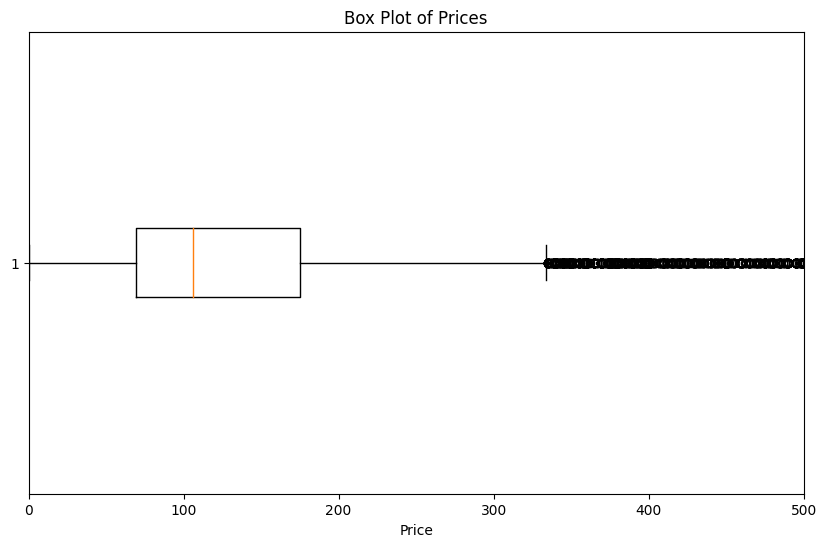

In [4]:
import matplotlib.pyplot as plt
import pandas as pd 

file_path= r"C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\cleaning dataset.csv"
df=pd.read_csv(file_path)

plt.figure(figsize=(10, 6))
plt.boxplot(df['price'].dropna(), vert=False)  # Dropping NaN values and making the plot horizontal
plt.title('Box Plot of Prices')
plt.xlabel('Price')
plt.xlim(0, 500)  # Adjust the limit based on your data distribution
plt.show()